# Tugas Praktikum

## Praktikum 1

In [1]:
import pandas as pd

# Load dataset
file_path = 'Mall_Customers.csv'
df = pd.read_csv(file_path)

In [2]:
df.head(), df.columns

(   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
 0           1    Male   19                  15                      39
 1           2    Male   21                  15                      81
 2           3  Female   20                  16                       6
 3           4  Female   23                  16                      77
 4           5  Female   31                  17                      40,
 Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
        'Spending Score (1-100)'],
       dtype='object'))

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Rename columns for easier access
df.rename(columns={
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'Spending'
}, inplace=True)

In [4]:
# Select relevant features for clustering
X = df[['Income', 'Spending']]

# Elbow method to determine the optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

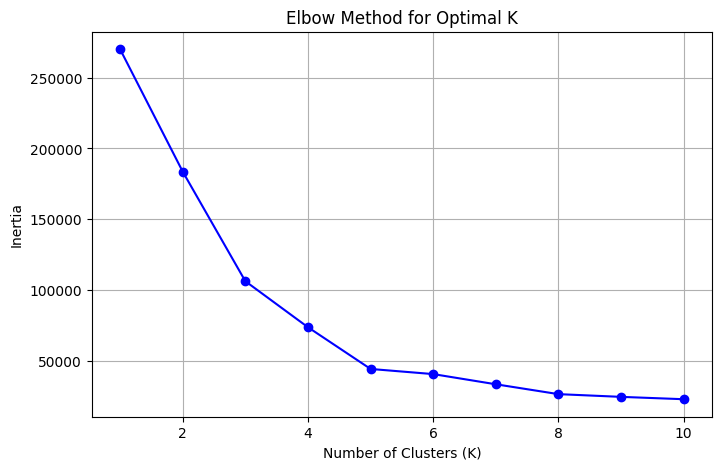

In [5]:
# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

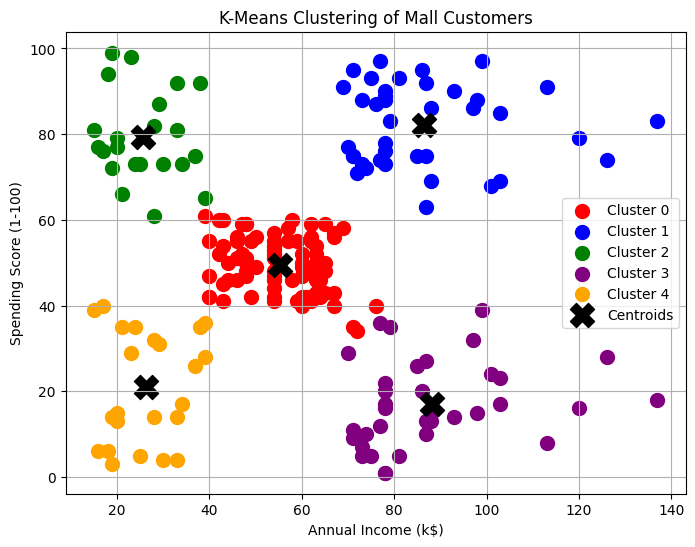

In [6]:
# Lakukan K-Means dengan K = 5
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualisasi hasil klusterisasi
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(5):
    plt.scatter(
        X[df['Cluster'] == i]['Income'],
        X[df['Cluster'] == i]['Spending'],
        s=100,
        c=colors[i],
        label=f'Cluster {i}'
    )

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=300, c='black', marker='X', label='Centroids'
)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering of Mall Customers')
plt.legend()
plt.grid(True)
plt.show()


## Praktikum 2

In [7]:
from sklearn.preprocessing import StandardScaler
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Normalisasi sebelum DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN + tuning eps untuk mendekati jumlah kluster K=5
from sklearn.cluster import DBSCAN
import numpy as np

# Uji berbagai nilai eps
results = {}
for eps in np.arange(0.3, 1.0, 0.05):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    results[round(eps, 2)] = n_clusters

In [9]:
results

{np.float64(0.3): 7,
 np.float64(0.35): 6,
 np.float64(0.4): 4,
 np.float64(0.45): 3,
 np.float64(0.5): 2,
 np.float64(0.55): 1,
 np.float64(0.6): 1,
 np.float64(0.65): 1,
 np.float64(0.7): 1,
 np.float64(0.75): 1,
 np.float64(0.8): 1,
 np.float64(0.85): 1,
 np.float64(0.9): 1,
 np.float64(0.95): 1}

C:\Users\User\AppData\Local\Temp\ipykernel_4932\466853216.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


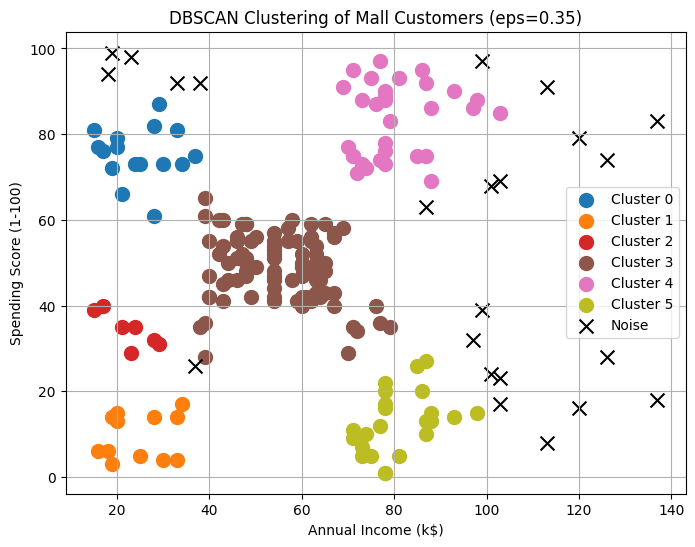

In [10]:
import matplotlib.pyplot as plt

# Terapkan DBSCAN dengan eps=0.35
dbscan = DBSCAN(eps=0.35, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Visualisasi hasil klusterisasi DBSCAN
plt.figure(figsize=(8, 6))
unique_labels = set(df['DBSCAN_Cluster'])
colors = plt.cm.get_cmap('tab10', len(unique_labels))

for label in unique_labels:
    label_mask = df['DBSCAN_Cluster'] == label
    if label == -1:
        # Noise
        plt.scatter(
            df[label_mask]['Income'],
            df[label_mask]['Spending'],
            s=100,
            c='black',
            marker='x',
            label='Noise'
        )
    else:
        plt.scatter(
            df[label_mask]['Income'],
            df[label_mask]['Spending'],
            s=100,
            color=colors(label),
            label=f'Cluster {label}'
        )

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering of Mall Customers (eps=0.35)')
plt.legend()
plt.grid(True)
plt.show()
